In [19]:
# Exercise 1:
import pandas as pd

data_diabetes=pd.read_csv('diabetes_prediction_dataset.csv',sep=',')

data_diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [20]:
print(data_diabetes.shape)

data_diabetes.describe()

(100000, 9)


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [21]:
data_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [22]:
# Count the number of diabetics (value 1) and non-diabetics (value 0)
diabetic_count = data_diabetes[data_diabetes['diabetes'] == 1].shape[0]  # Nombre de diabétiques
non_diabetic_count = data_diabetes[data_diabetes['diabetes'] == 0].shape[0]  # Nombre de non diabétiques

# Results display
print(f"Diabetics : {diabetic_count}")
print(f"Non-diabetics number : {non_diabetic_count}")

Diabetics : 8500
Non-diabetics number : 91500


In [23]:
from sklearn.model_selection import train_test_split

# Define the features (X) and the target (y)
X = data_diabetes.drop(columns=['diabetes'])  # Features (all columns except the target column)
y = data_diabetes['diabetes']  # Target variable (e.g., diabetes, fraud, etc.)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 80000 samples
Testing set size: 20000 samples


# Exercise 2:

Logistic Regression
Why use it?
Logistic Regression is a simple and effective model for binary classification problems. It works well when there is a linear relationship between the features and the target variable.
Do we need to standardize?
Yes, Logistic Regression can benefit from data standardization, especially if the features have different units or scales. Standardizing the data makes the gradient descent optimization process more efficient and helps the model converge faster.

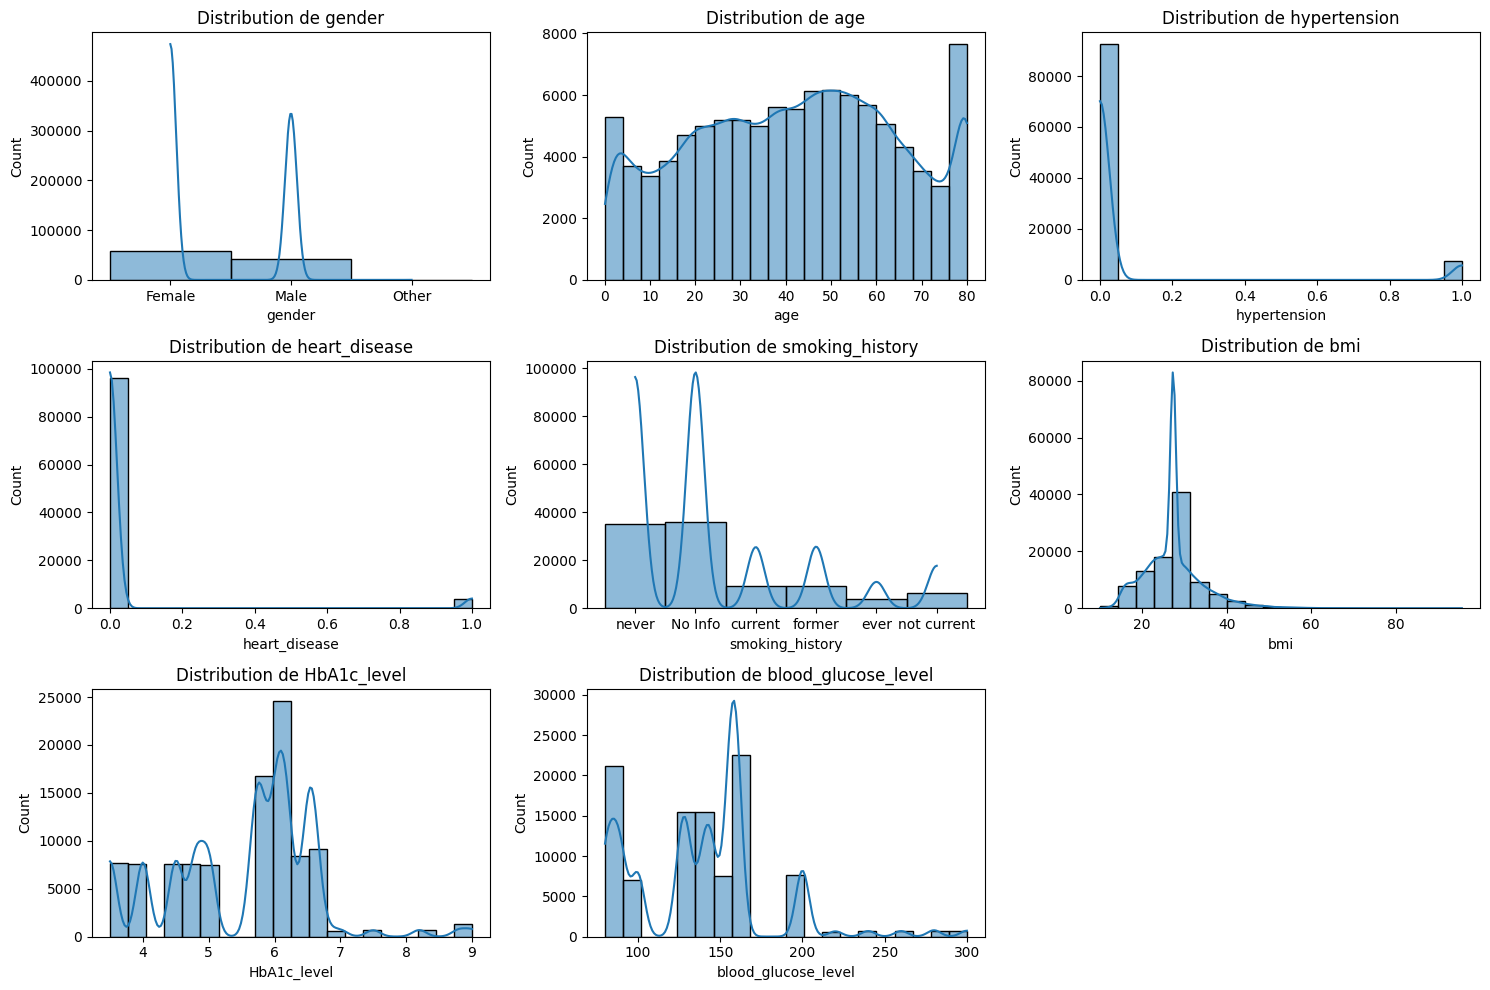

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 10))

# Variables distribution
for i, column in enumerate(data_diabetes.columns[:-1]):
    plt.subplot(3, 3, i+1)  # 3x3 grille de graphiques
    sns.histplot(data_diabetes[column], kde=True, bins=20)
    plt.title(f'Distribution de {column}')


plt.tight_layout()
plt.show()

In [25]:
# Exercise 3:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



# 1. Separate the features and the target
X = data_diabetes.drop(columns=['diabetes'])  # Features
y = data_diabetes['diabetes']  # Target

# 2. Encoding of 'gender' (binary)
label_encoder = LabelEncoder()
X['gender'] = label_encoder.fit_transform(X['gender'])  # 'Male' -> 0, 'Female' -> 1

# 3. Encoding of 'smoking_history' with LabelEncoder
label_encoder_smoking = LabelEncoder()
X['smoking_history'] = label_encoder_smoking.fit_transform(X['smoking_history'])  # Each category become 0, 1, 2...

# 4. Separation into train and test (20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Standardize only numeric variables (exclude 'gender' and 'smoking_history')
num_cols = [col for col in X.columns if col not in ['gender', 'smoking_history']]

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])  # Standardization of numeric features
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])  # Apply the transformation to the test set

print(X_train_scaled)
# 6. Model training
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# 7. Predictions
y_pred = model.predict(X_test_scaled)

# 8. Model evaluation
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))



       gender       age  hypertension  heart_disease  smoking_history  \
75220       1  1.378720     -0.286309      -0.203559                3   
48955       1  1.689866     -0.286309      -0.203559                4   
44966       0 -0.177011     -0.286309      -0.203559                2   
13568       0 -0.710404     -0.286309      -0.203559                5   
92727       0  0.845326      3.492727      -0.203559                1   
...       ...       ...           ...            ...              ...   
6265        1  0.311933     -0.286309      -0.203559                4   
54886       0 -1.199348     -0.286309      -0.203559                4   
76820       1  0.000787     -0.286309      -0.203559                4   
860         0 -0.221460     -0.286309      -0.203559                4   
15795       0 -0.843752     -0.286309      -0.203559                4   

            bmi  HbA1c_level  blood_glucose_level  
75220 -0.386474    -1.892451            -1.425157  
48955 -0.412172    

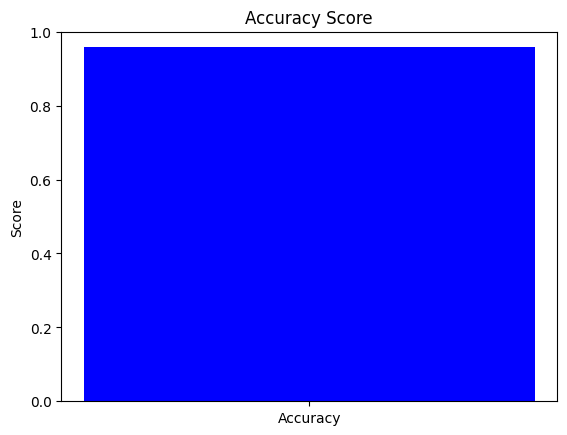

Accuracy Score: 0.9587


In [26]:
# Exercise 4:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Calculate accuracy on test set
accuracy = accuracy_score(y_test, y_pred)

# Plot accuracy score
plt.bar(['Accuracy'], [accuracy], color='blue')
plt.ylim(0, 1)
plt.title('Accuracy Score')
plt.ylabel('Score')
plt.show()

print(f"Accuracy Score: {accuracy:.4f}")

Accuracy:

The accuracy indicates that over all predictions, 95.87% of these predictions are correct, having correctly detected true diabetics and true non-diabetics. Overall, the model is very efficient.

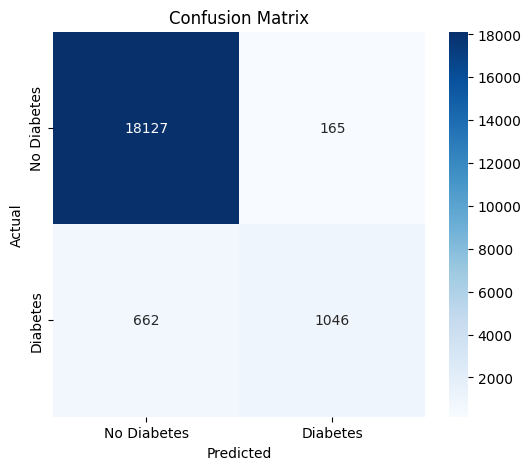

Confusion Matrix:
[[18127   165]
 [  662  1046]]


In [27]:

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# **Confusion Matrix**
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print(f"Confusion Matrix:\n{cm}")

Of the 20,000 cases of individuals, 18,127 individuals are true negative and therefore not diabetic.

-1046 individuals are classified as diabetic for both the predictions and displayed by the actual values.

-165 individuals are false positives, i.e. the predictions indicate that these people are diabetic while the actual values ​​indicate that they are not diabetic

-662 are false negatives, i.e. the predictions indicate that these people are non-diabetic while in reality they are diabetic.

-18,127 individuals are classified as non-diabetic by both actual and predicted data

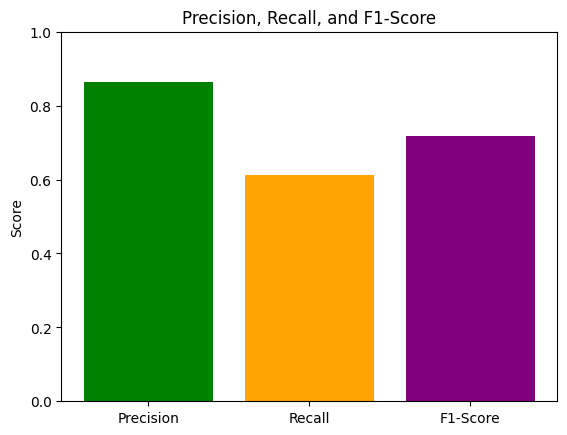

Precision: 0.8637
Recall: 0.6124
F1-Score: 0.7167


In [28]:
# **Precision, Recall, F1-Score**
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

metrics = [precision, recall, f1]
metrics_labels = ['Precision', 'Recall', 'F1-Score']

plt.bar(metrics_labels, metrics, color=['green', 'orange', 'purple'])
plt.ylim(0, 1)
plt.title('Precision, Recall, and F1-Score')
plt.ylabel('Score')
plt.show()

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Among the real diabetics, 61.24% are well detected as diabetic, the model is not performing well enough at this level.
Of the 20,000 individuals, there are still 662 individuals who were predicted as non-diabetic while they were actually diabetic.

F1-score is the harmonic mean between recall and precision. An F1-score of 71% (0.71) means that the classification model has a good balance between precision and recall, but there is still margin for improvement to implement.

A precision of 86.3% means that 86.3% of the instances predicted as positive are actually positive, there are few false positives.
A precision of 86.3% means that when it predicts "diabetic", it is wrong only in 13.7% of cases. So the model performs quite well.

On the other hand, there are better results for the non-diabetic class:

A precision of 96% and a recall of 99%, we have therefore predicted many cases of true non-diabetic and detected very few cases of false non-diabetic and a F1-score very high too of 98% vs 72% for diabetic class.

<Figure size 800x600 with 0 Axes>

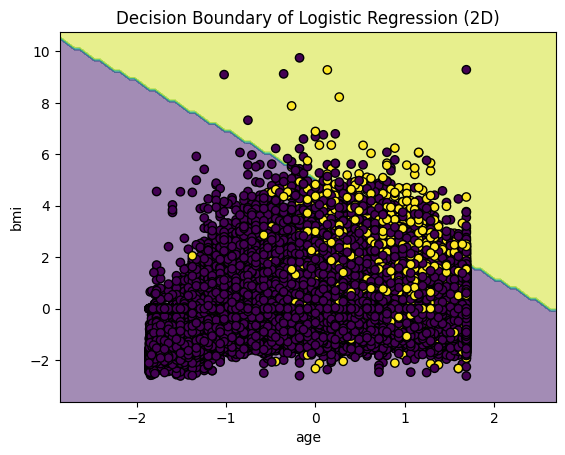

In [29]:
# Exercise 5:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay

# Select two features (Replace 'feature1' and 'feature2' with actual column names)
feature1 = "age"
feature2 = "bmi"

X_train_2D = X_train_scaled[['age', 'bmi']]
X_test_2D = X_test_scaled[['age', 'bmi']]

# Train a new Logistic Regression model on 2D data
model_2D = LogisticRegression()
model_2D.fit(X_train_2D, y_train)

# Plot Decision Boundary
plt.figure(figsize=(8, 6))
disp = DecisionBoundaryDisplay.from_estimator(model_2D, X_train_2D, response_method="predict", alpha=0.5)
plt.scatter(X_train_2D["age"], X_train_2D["bmi"], c=y_train, edgecolor="k")
plt.xlabel('age')
plt.ylabel('bmi')
plt.title("Decision Boundary of Logistic Regression (2D)")
plt.show()


The decision boundary graph shows that the differentiation between the 2 classes(diabetics vs non-diabetics) is not very clear with one class in particular, that of diabetics, which is found in the zone of the non-diabetic class.
The majority of points in the non-diabetic class are well distant from the decision boundary, except for certain points.

[1. 1. 1. ... 1. 1. 1.]


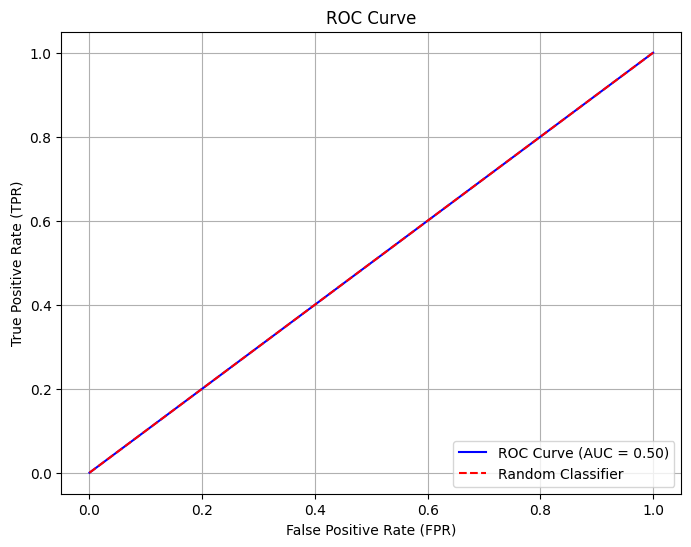

In [30]:
# Exercise 6:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Make predictions on the test set, but get the probability of the positive class (diabetes)
y_prob = model.predict_proba(X_test)[:, 1]  # The second column contains the probabilities for class 1 (diabetes)

print(y_prob)
# Calculate the false positive rate (FPR) and true positive rate (TPR)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

The ROC curve plots the sensitivity (Recall) against the false positive rate for different decision thresholds of the model. We can observe that the ROC curve is linear (50/50), which means that the model is not efficient overall.